In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

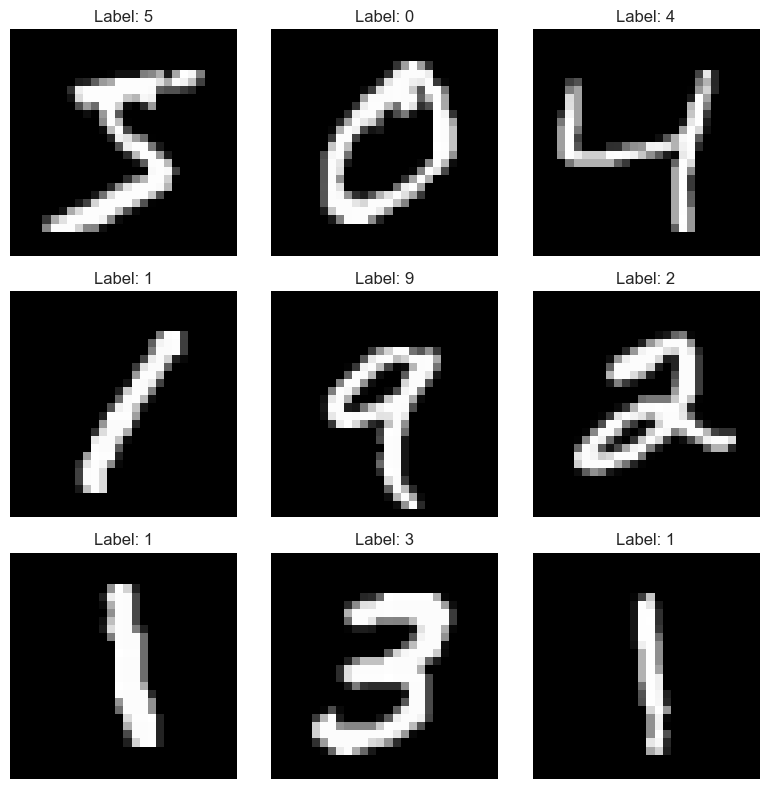

In [3]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [4]:
from tensorflow.keras.utils import to_categorical

# Normalisation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape: (28, 28) -> (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encoding des labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes pour les chiffres 0 à 9
])

C:\Users\User\Code\reseaux_neuronaux\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [8]:
# Entraînement
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.7736 - loss: 0.7200 - val_accuracy: 0.9757 - val_loss: 0.0819
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9643 - loss: 0.1210 - val_accuracy: 0.9846 - val_loss: 0.0550
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9740 - loss: 0.0857 - val_accuracy: 0.9871 - val_loss: 0.0460
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9809 - loss: 0.0649 - val_accuracy: 0.9872 - val_loss: 0.0456
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9836 - loss: 0.0569 - val_accuracy: 0.9883 - val_loss: 0.0411
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9864 - loss: 0.0459 - val_accuracy: 0.9900 - val_loss: 0.0365
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9871 - loss: 0.0415 - val_accuracy: 0.9894 - val_loss: 0.0379
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9877 - loss: 0.0380 - val_accu

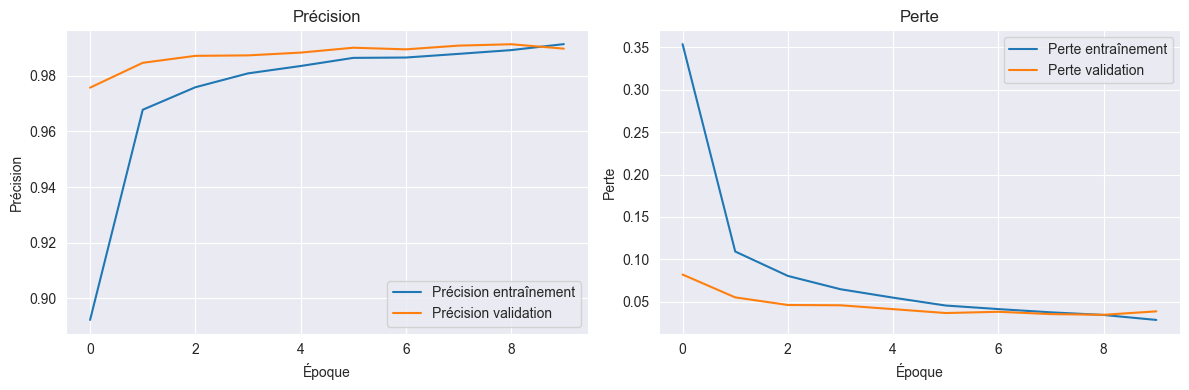

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision entraînement')
plt.plot(history.history['val_accuracy'], label='Précision validation')
plt.title('Précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.legend()

# Perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte entraînement')
plt.plot(history.history['val_loss'], label='Perte validation')
plt.title('Perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

plt.tight_layout()
plt.savefig("courbes_entraînement_MNIST.png")
plt.show()

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0355

Test accuracy: 0.9910


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


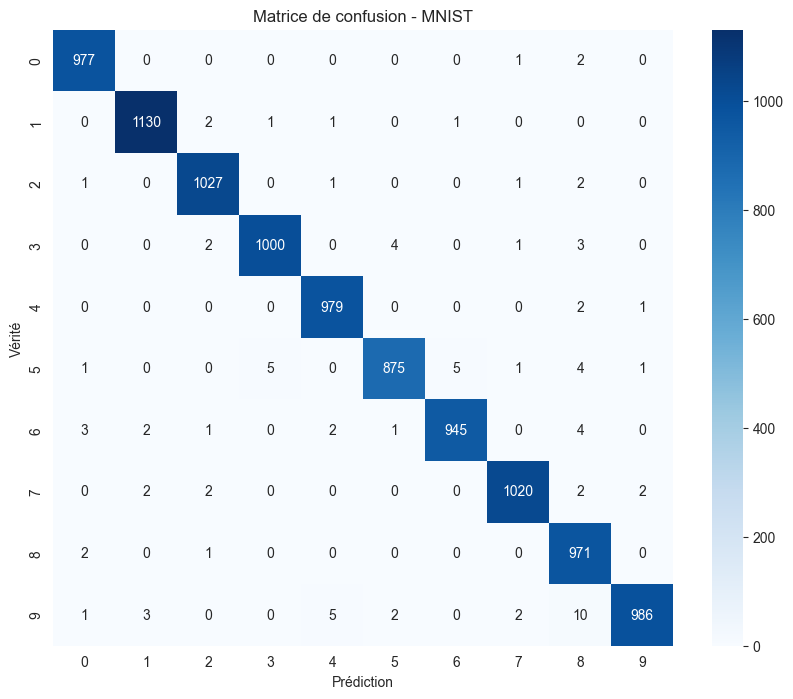

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion - MNIST')
plt.show()

La plus grosse confusion se situe entre les 8 et les 9

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2  # OpenCV pour traiter les images


# Fonction pour tester une image
def predict_image(image_path, model, target_size=(28, 28)):
    # Charger l'image
    img = image.load_img(image_path, target_size=target_size)

    # Vérifier si l'image est en couleur (RGB) ou en niveau de gris
    if img.mode != 'L':  # Si ce n'est pas une image en niveau de gris
        # Convertir l'image en niveau de gris
        img = img.convert('L')

    # Convertir l'image en tableau numpy
    img_array = image.img_to_array(img)

    # Normaliser l'image
    img_array = img_array.astype('float32') / 255.0

    # Reshaper pour ajouter la dimension du batch (1, 28, 28, 1)
    img_array = np.expand_dims(img_array, axis=0)

    # Prédire l'étiquette
    predictions = model.predict(img_array)

    # Trouver la classe avec la plus grande probabilité
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions) * 100

    # Afficher l'image et la prédiction
    plt.imshow(img, cmap='gray')
    plt.title(f"Prédiction: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


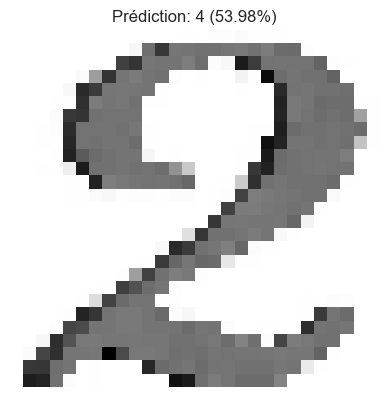

(4, 53.97753715515137)

In [12]:
image_path = 'data_jour_5/test_mnist/deux.jpg'  # Remplace par le chemin de ton image
predict_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


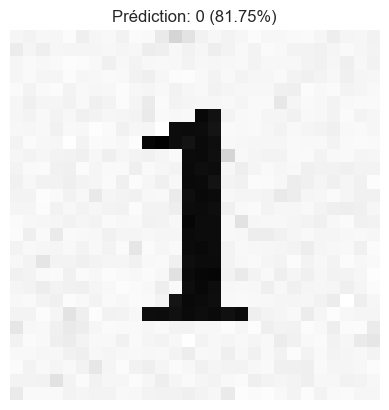

(0, 81.74753189086914)

In [13]:
image_path = 'data_jour_5/test_mnist/un.png'
predict_image(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


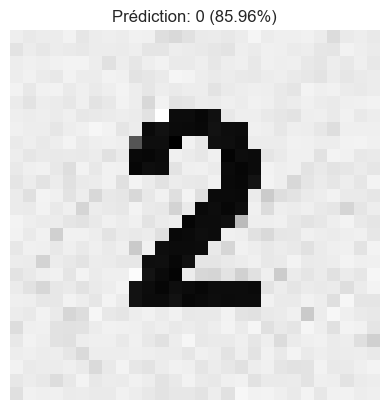

(0, 85.96351146697998)

In [14]:
image_path = 'data_jour_5/test_mnist/deux.png'
predict_image(image_path, model)